In [1]:
import pandas as pd
import numpy as np

In [2]:
labels_df = pd.read_csv('labels.csv',names=['lat','lng','label1','label2','label3', 'filename'])

In [3]:
total_rows_len = len(labels_df)
print(f"\nTotal number of rows (using len()): {total_rows_len}")
labels_df.head()


Total number of rows (using len()): 2178


,lat,lng,label1,label2,label3,filename
0,10.328221,-20.476357,FR II,NaN,NaN,NaN
1,92.109802,-49.431413,typical,NaN,NaN,NaN
2,88.916825,-59.431868,Point Source,NaN,NaN,NaN
3,5.457981,-25.589637,FR II,NaN,NaN,NaN
4,119.417608,-53.396711,FR II,NaN,NaN,NaN


In [4]:

import os

filenames = os.listdir('Data/typ/typ_PNG') + os.listdir('Data/exo/exo_PNG')
print(f"Total number of files: {len(filenames)}")
for i in range(5):
    print(filenames[i])

Total number of files: 2108
0.250 -25.084_[0.02238656 0.02238656] deg_(Abell_141_1pln-forPyBDSF.FITS).fits.png
0.316 -24.707_[0.0166409 0.0166409] deg_(Abell_141_1pln-forPyBDSF.FITS).fits.png
0.327 -24.571_[0.02705031 0.02705031] deg_(Abell_141_1pln-forPyBDSF.FITS).fits.png
0.371 -24.554_[0.009 0.009] deg_(Abell_141_1pln-forPyBDSF.FITS).fits.png
0.425 -25.211_[0.02334787 0.02334787] deg_(Abell_141_1pln-forPyBDSF.FITS).fits.png


In [5]:
print(labels_df.dtypes)

lat         float64
lng         float64
label1       object
label2       object
label3       object
filename    float64
dtype: object


In [6]:
for i, filename in enumerate(filenames,start=0):
    coordinates = filename.split('_')[0]
    if coordinates.count(' ') != 1:
        print(f"Skipping filename with unexpected format: {filename}")
        continue
    
    lat, lng = coordinates.split(' ')
    lat, lng = float(lat), float(lng)
   
    label_row = labels_df[(labels_df['lat'].round(3) == lat) & (labels_df['lng'].round(3) == lng)]
    if not label_row.empty:
        labels_df.loc[label_row.index, 'filename'] = filename

C:\Users\User\AppData\Local\Temp\ipykernel_6564\110920357.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.250 -25.084_[0.02238656 0.02238656] deg_(Abell_141_1pln-forPyBDSF.FITS).fits.png' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  labels_df.loc[label_row.index, 'filename'] = filename


Skipping filename with unexpected format: .ipynb_checkpoints


In [7]:
labels_df[labels_df['filename'].str.contains('1.597 -23.559', na=False)]

,lat,lng,label1,label2,label3,filename


In [8]:
#print missed labels where filename is not null
missed_labels_df = labels_df[labels_df['filename'].isnull()]

In [9]:
print(f"\nNumber of missed labels (filename is null): {len(missed_labels_df)}")


Number of missed labels (filename is null): 202


In [10]:
missed_labels_df.head()

,lat,lng,label1,label2,label3,filename
8,351.664270,-40.441765,Should be discarded,NaN,NaN,NaN
10,3.751163,-29.920867,Should be discarded,NaN,NaN,NaN
18,172.646749,-41.932433,Should be discarded,NaN,NaN,NaN
20,97.471185,-56.563903,Should be discarded,NaN,NaN,NaN
23,61.156721,-71.298579,Should be discarded,NaN,NaN,NaN


In [11]:
missed_labels_df['label1'].value_counts()

label1
Should be discarded    130
Point Source            45
FR II                   14
Bent                     8
FR I                     5
Name: count, dtype: int64

In [12]:
missed_labels_df[missed_labels_df['label1'] == 'Point Source'].round(3)

,lat,lng,label1,label2,label3,filename
50,144.600,-76.688,Point Source,Should be discarded,NaN,NaN
487,99.299,-48.271,Point Source,Should be discarded,NaN,NaN
530,49.015,-45.247,Point Source,Should be discarded,NaN,NaN
617,48.944,-45.141,Point Source,Should be discarded,NaN,NaN
754,10.626,-9.358,Point Source,Should be discarded,NaN,NaN
831,61.692,-71.275,Point Source,NaN,Should be discarded,NaN
1146,124.812,-56.955,Point Source,NaN,NaN,NaN
1214,238.526,-76.147,Point Source,Should be discarded,NaN,NaN
1296,92.846,-48.201,Point Source,Should be discarded,NaN,NaN
1323,115.922,-53.675,Point Source,Should be discarded,NaN,NaN


In [13]:
labels_df['label1'].value_counts()

label1
FR II                  683
Point Source           442
FR I                   431
Bent                   428
Should be discarded    130
typical                 24
Exotic                  18
S/Z shaped              17
X-Shaped                 5
Name: count, dtype: int64

In [14]:
labels_df['label2'].value_counts()

label2
Bent                   97
Should be discarded    69
Exotic                 33
S/Z shaped              4
X-Shaped                1
Name: count, dtype: int64

In [15]:
labels_df['label3'].value_counts()

label3
Exotic                 5
Should be discarded    1
Name: count, dtype: int64

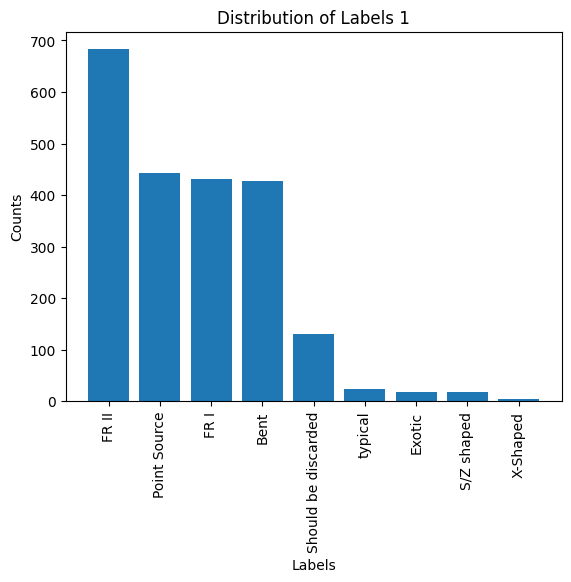

In [16]:
#plot a bar chart of the label1 value counts
import matplotlib.pyplot as plt

label_counts = labels_df['label1'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Labels 1')
plt.show()

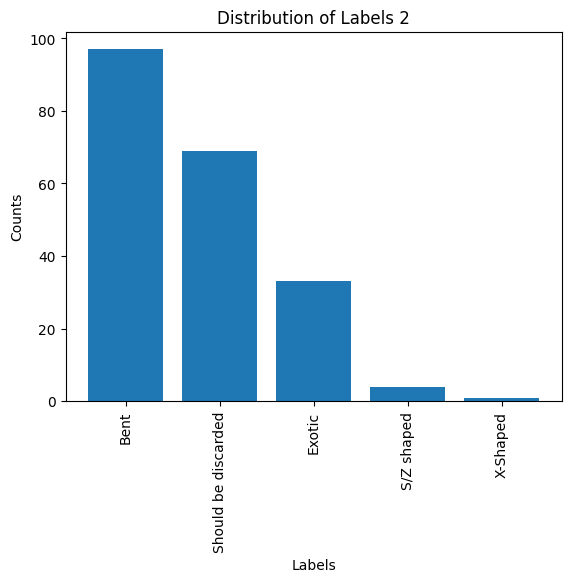

In [17]:
#plot a bar chart of the label1 value counts
import matplotlib.pyplot as plt

label_counts = labels_df['label2'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Labels 2')
plt.show()

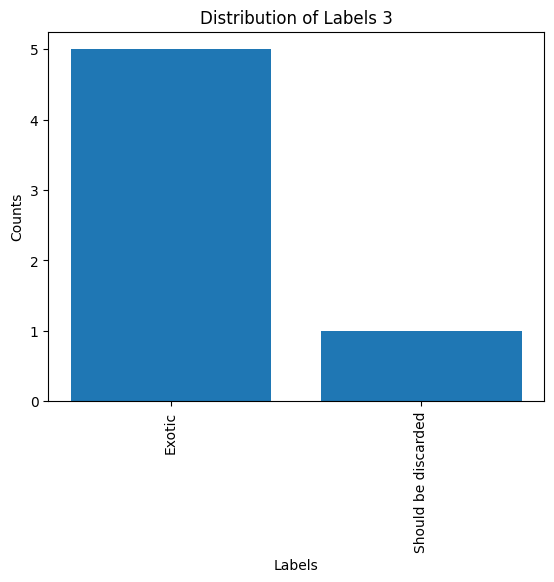

In [18]:
#plot a bar chart of the label1 value counts
import matplotlib.pyplot as plt

label_counts = labels_df['label3'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Labels 3')
plt.show()